   feature_1  feature_2     target
0  -1.012831   0.314247 -26.306317
1   0.067528  -1.424748 -23.375653
2   1.477894  -0.518270  46.244853
3   0.087047  -0.299007  -0.723536
4  -0.463418  -0.465730 -33.380645


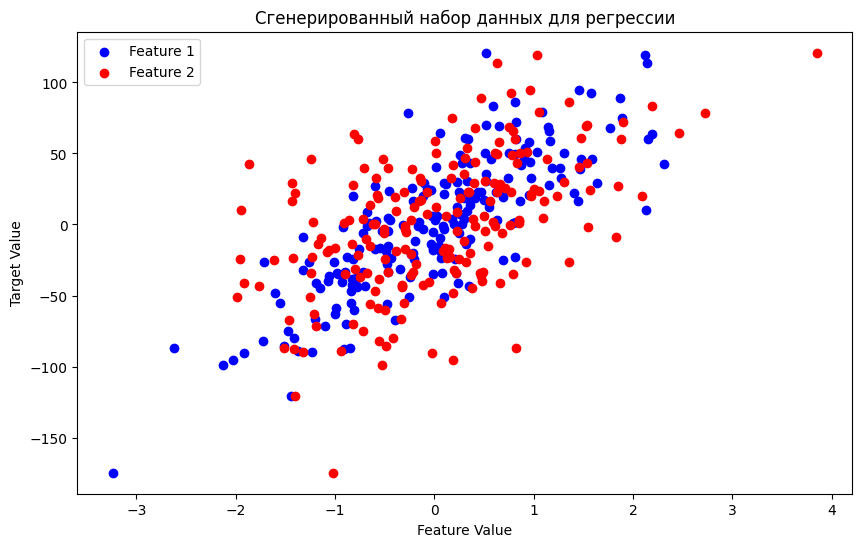

In [8]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
# Параметры для генерации набора данных
num_samples = 200  # Количество образцов
num_features = 2   # Количество признаков
noise_level = 10.0  # Уровень шума

# Генерация данных
X, y = make_regression(n_samples=num_samples, n_features=num_features, noise=noise_level, random_state=42)

# Конвертация данных в DataFrame для удобства работы
data = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(num_features)])
data['target'] = y

# Просмотр первых строк данных
print(data.head())
# Визуализация данных (если только 2 признака)
plt.figure(figsize=(10, 6))
plt.scatter(data['feature_1'], data['target'], color='blue', label='Feature 1')
plt.scatter(data['feature_2'], data['target'], color='red', label='Feature 2')
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("Сгенерированный набор данных для регрессии")
plt.legend()
plt.show()

In [17]:
import kaggle
import pandas as pd
from tabulate import tabulate
# Путь, где будет загружен файл
dataset_path = "C:/Users/Miha/Downloads"

# Скачивание и распаковка
kaggle.api.dataset_download_files("muhammetvarl/laptop-price", path=dataset_path, unzip=True)

# Загрузка набора данных в DataFrame

data = pd.read_csv(f"{dataset_path}/laptop_price.csv", encoding="latin-1")
# Проверка загруженных данных
print(tabulate(data.head(), headers="keys", tablefmt="fancy_grid"))



Dataset URL: https://www.kaggle.com/datasets/muhammetvarl/laptop-price
╒════╤═════════════╤═══════════╤═════════════╤════════════╤══════════╤════════════════════════════════════╤════════════════════════════╤═══════╤═════════════════════╤══════════════════════════════╤═════════╤══════════╤═══════════════╕
│    │   laptop_ID │ Company   │ Product     │ TypeName   │   Inches │ ScreenResolution                   │ Cpu                        │ Ram   │ Memory              │ Gpu                          │ OpSys   │ Weight   │   Price_euros │
╞════╪═════════════╪═══════════╪═════════════╪════════════╪══════════╪════════════════════════════════════╪════════════════════════════╪═══════╪═════════════════════╪══════════════════════════════╪═════════╪══════════╪═══════════════╡
│  0 │           1 │ Apple     │ MacBook Pro │ Ultrabook  │     13.3 │ IPS Panel Retina Display 2560x1600 │ Intel Core i5 2.3GHz       │ 8GB   │ 128GB SSD           │ Intel Iris Plus Graphics 640 │ macOS   │ 1.37kg   │      

In [18]:
import numpy as np
import pandas as pd

# Параметри набору даних
n_samples = 100  # кількість зразків
n_features = 1   # кількість ознак (1 для простої лінійної регресії)

# Генерація випадкових значень ознаки (X)
np.random.seed(0)  # для відтворюваності результатів
X = np.random.rand(n_samples, n_features) * 10  # масштабування до діапазону 0-10

# Встановлення коефіцієнтів для лінійного рівняння: y = a * X + b + шум
a = 2.5    # коефіцієнт (нахил лінії)
b = 5.0    # зсув (перетин з віссю Y)
noise = np.random.normal(0, 1, n_samples)  # додавання шуму

# Обчислення значень залежної змінної (y) з додаванням шуму
y = a * X.flatten() + b + noise

# Перетворення даних у DataFrame для зручності роботи
data = pd.DataFrame({'X': X.flatten(), 'y': y})
print(data.head())

          X          y
0  5.488135  17.555188
1  7.151894  23.780561
2  6.027634  20.534747
3  5.448832  17.085836
4  4.236548  17.079622


Середня абсолютна помилка (MAE): 0.90
Коефіцієнт детермінації (R²): 0.98


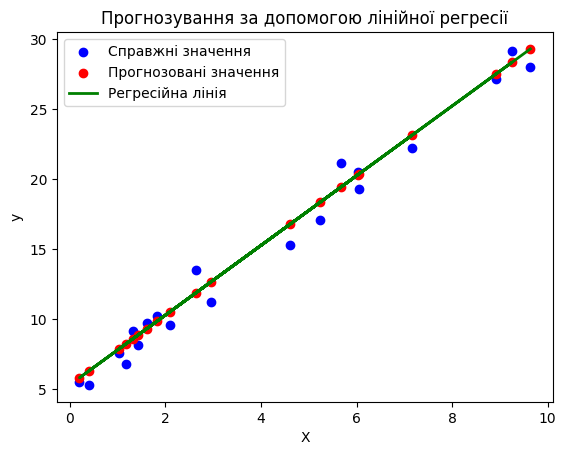

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Генерація даних
n_samples = 100
np.random.seed(0)
X = np.random.rand(n_samples, 1) * 10
a = 2.5
b = 5.0
noise = np.random.normal(0, 1, n_samples)
y = a * X.flatten() + b + noise

# Перетворення даних у DataFrame
data = pd.DataFrame({'X': X.flatten(), 'y': y})

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Навчання моделі
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування
y_pred = model.predict(X_test)

# Оцінка моделі
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Середня абсолютна помилка (MAE): {mae:.2f}")
print(f"Коефіцієнт детермінації (R²): {r2:.2f}")

# Візуалізація результатів
plt.scatter(X_test, y_test, color='blue', label='Справжні значення')
plt.scatter(X_test, y_pred, color='red', label='Прогнозовані значення')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Регресійна лінія')
plt.title('Прогнозування за допомогою лінійної регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
